<a href="https://colab.research.google.com/github/ikhlas15/ATHENS-AI-Medical-Imaging/blob/main/H02_image_ops_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 02: Image Processing Fundamentals from Scratch**

### **Course**: Artificial Intelligence in Medical Imaging: From Fundamentals to Applications

***

## **1. Introduction**

Welcome back! In the last session, we learned how to load and inspect different types of medical images. Now, it's time to start manipulating them.

This notebook will teach you the fundamental principles of **image processing** from the ground up. We will implement common operations using only Python and the **NumPy** library. Understanding these concepts from first principles is essential, as they form the basis of the more complex operations performed by deep learning models.

#### **What you will learn today:**
*   How to perform basic operations like **thresholding**, **intensity windowing**, and **cropping** on medical images.
*   The concept of **convolution** and how to implement it from scratch.
*   How to use convolution with specific **kernels** to achieve effects like **blurring** (noise reduction) and **edge detection**.
*   Why these operations are crucial for preparing medical images for analysis.

***

## **2. Setup: Loading a Medical Image**

First, let's install the necessary libraries and load the same sample CT image we used in the previous notebook. We will work with its pixel data, which is represented as a NumPy array.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 25.8 MB/s eta 0:00:00
Image shape: (128, 128)
Image data type: float64
Intensity range (HU): -896.00 to 1167.00


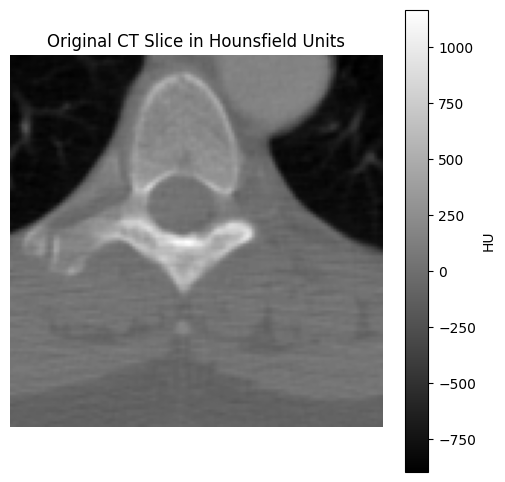

In [ ]:
# Install pydicom for loading DICOM files

#Import all required libraries: pydicom numpy matplotlib



# TODO: Import the function to extract the path of the DICOM sample file


# Load a sample "CT_small.dcm" DICOM CT file
dicom_file_path = get_testdata_file()
dicom_data =

# Convert the raw pixel data to Hounsfield Units (HU)
image_hu =

print(f"Image shape: {image_hu.shape}")
print(f"Image data type: {}")
print(f"Intensity range (HU): {np.min(image_hu):.2f} to {}")

# Display the original image
plt.figure(figsize=(6, 6))
# TODO: Display the original image with the gray colormap

# TODO: Add the title "Original CT Slice in Hounsfield Units"

plt.colorbar(label="HU")
# TODO: Hide the axis
plt.show()

***

## **3. Basic Image Operations from Scratch**

These are simple but powerful matrix operations that form the basis of many preprocessing pipelines.

### **3.1. Intensity Windowing (Contrast Adjustment)**

As you can see from the plot above, the HU values have a very wide range. Most of this range (e.g., air at -1000 HU) is not useful for visualizing soft tissue or bone. **Intensity windowing** is the process of mapping a specific range of HU values to the full grayscale display range (0 to 255).

This is equivalent to adjusting the brightness and contrast to highlight specific tissues.

*   **Window Level (L):** The center of the HU range you want to view.
*   **Window Width (W):** The total width of the HU range.

Let's implement this from scratch.

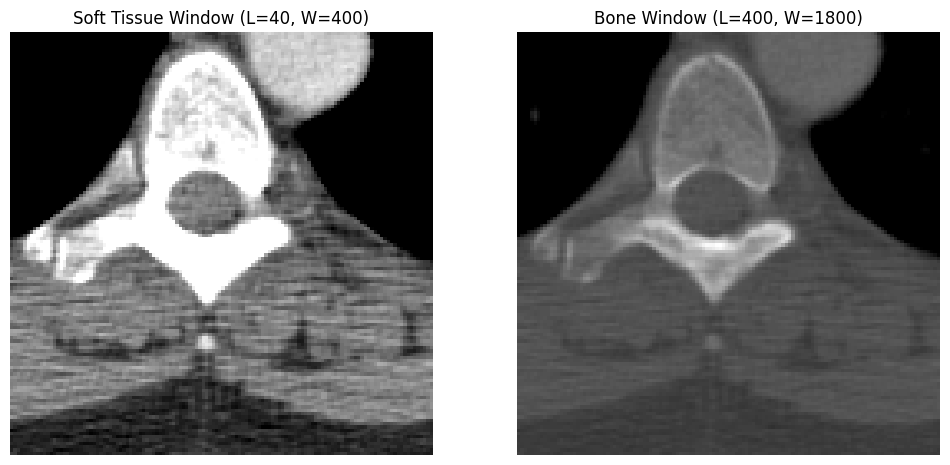

In [ ]:
def apply_windowing(image, window_level, window_width):
    """
    Apply intensity windowing:
    - Compute min and max HU
    - Clip to [min, max]
    - Map to [0, 255]
    """
    # 1) Compute min and max values of the window
    min_value = ...
    max_value = ...

    # 2) Clip image between min and max using np.clip
    windowed_image = ...

    # 3) Normalize to [0, 255] for display
    windowed_image = ...

    return windowed_image.astype(np.uint8)

# Common window settings for CT scans
# 'Soft Tissue' window: Level=40, Width=400
soft_tissue_window =

# 'Bone' window: Level=400, Width=1800
bone_window =

# Display the results
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(soft_tissue_window, cmap=plt.cm.gray)
axes[0].set_title("Soft Tissue Window (L=40, W=400)")
axes[0].axis('off')

#Display the results for bone window


plt.show()

*Notice how the soft tissue window clearly shows the internal organs, while the bone window makes the spine and ribs stand out.*

### **3.2. Thresholding**

**Thresholding** is used to create a binary (black and white) image by setting all pixels above a certain intensity value to 1 (white) and all others to 0 (black). This is one of the simplest methods for **segmentation**, i.e., isolating a structure of interest.

Let's create a mask that only shows very dense tissue, like bone.


Shape of the mask: (128, 128)
Unique values in the mask: [0 1]


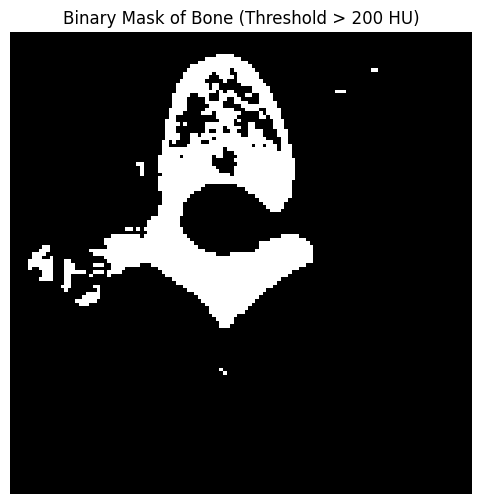

In [ ]:
# We'll use the original HU image for this
# Let's set a threshold to identify bone
# TODO: Choose a threshold value in HU to isolate dense tissues (e.g., bone)
threshold_value = ...     # hint: bone is usually > 200 HU

# Create the binary mask
# TODO: Create a binary mask:  pixel (in image_hu) > threshold_value becomes 1, others become 0
bone_mask = ...

print(f"Shape of the mask: {}")
print(f"Unique values in the mask: {}") #If we see numbers other than 0 or 1, that means there is an error (because False=0, True=1)


# TODO: Display the binary mask using matplotlib
# figsize = (6,6), title = Binary Mask of Bone (Threshold > {threshold_value} HU, and hide axes





***

## **4. The Concept of Convolution**

**Convolution** is arguably the most important operation in image processing and the core component of Convolutional Neural Networks (CNNs).

It works by sliding a small matrix, called a **kernel** or **filter**, over every pixel of the input image. At each position, it computes a weighted sum of the underlying pixel values, producing a single output pixel. The result is a new, "filtered" image.


### **4.1. Implementing 2D Convolution from Scratch**

Let's write our own `conv2d` function. It will take an image and a kernel as input and return the convolved image. We will use **zero-padding** to ensure the output image has the same size as the input.

In [ ]:
def conv2d(image, kernel):
    """
    Performs a 2D convolution on an image using a given kernel.
    """
    # Get dimensions of the image and the kernel
    image_h, image_w = image.shape
    kernel_h, kernel_w =

    # TODO 2: Compute padding size (half of kernel size)
    pad_h, pad_w =

    # Create a padded image with zeros around the border
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')

    # Prepare the output image
    output_image = np.zeros_like(..., dtype=np.float64)

     # TODO 3: Flip the kernel (mathematical convolution)
    flipped_kernel = ...(...(kernel))

    # Slide the kernel over the image
    for i in range():
        for j in range():
            # Extract the region of interest from the padded image
            region = padded_image[i : i + kernel_h, j : j + kernel_w]

            # Perform element-wise multiplication and sum
            output_pixel = np.sum(...)
            output_image[i, j] =

    return output_image

### **4.2. Application 1: Blurring (Noise Reduction)**

One of the simplest kernels is a **box blur** (or averaging) kernel. It replaces each pixel with the average of its neighbors, which smooths the image and reduces random noise.

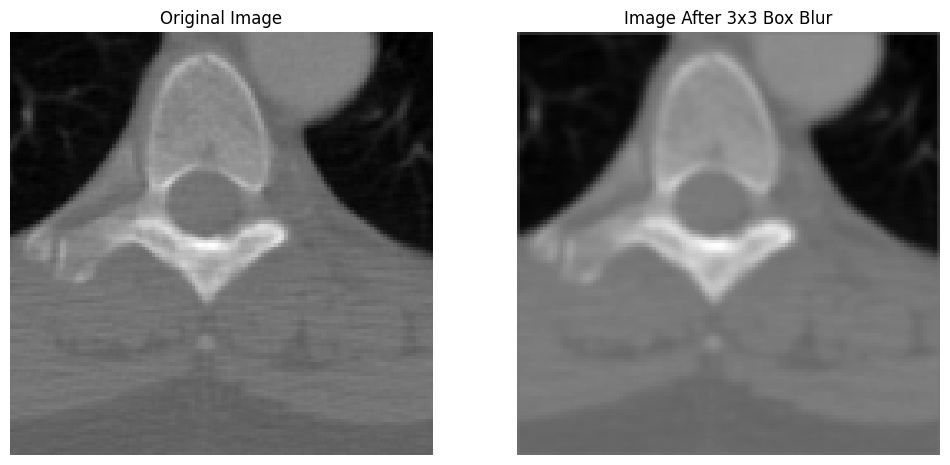

In [ ]:
# A 3x3 averaging kernel. The sum of all elements must be 1.
box_blur_kernel =

# Apply the convolution
blurred_image =

# Display the results
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow()
axes[0].set_title("Original Image")
axes[0].axis('off')

#Display the Image After 3x3 Box Blur

plt.show()

*Notice how the blurred image looks smoother, but also less sharp. This is a common trade-off.*

Notice how the blurred image looks smoother, but also less sharp. This is a common trade-off.

### **4.3. Effect of Kernel Size on Blurring**

The size of the kernel determines the size of the neighborhood used for averaging. A larger kernel considers more surrounding pixels, resulting in a more pronounced blurring effect. Let’s create a more sophisticated Gaussian blur and see how changing the kernel size affects the output.

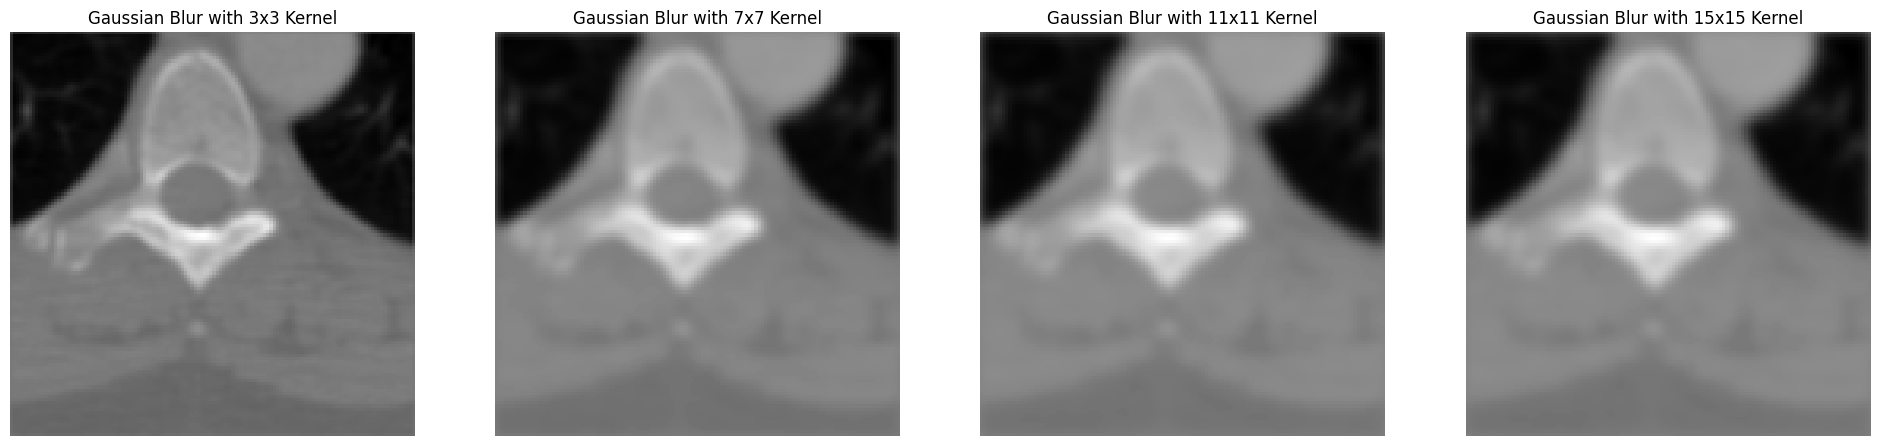

In [ ]:
# Function to create a Gaussian kernel
def gaussian_kernel(size, sigma=1.0):
    """Creates a 2D Gaussian kernel."""

    # TODO: Create a 1D coordinate axis from -center to +center
    ax = np.arange(-size // 2 + 1., )

    # TODO: Create a grid of (x,y) using meshgrid
    xx, yy = np.meshgrid(ax, ax)

    # TODO: Apply the Gaussian formula to compute the kernel
    kernel = np.exp()

    # TODO: Normalize the kernel so it sums to 1
    return kernel / ___


# Visualizing Gaussian blur for different kernel sizes
kernel_sizes = [3, 7, 11, 15]
fig, axes = plt.subplots(1, ..., figsize=(24, 6))

for i, size in enumerate(kernel_sizes):

    # TODO: Create the Gaussian kernel of the given size with sigma =2
    gauss_kernel =

    # TODO: Apply convolution to the image
    blurred_image =

    # TODO: Display the blurred image

    axes[i].set_title(f"Gaussian Blur with {size}x{size} Kernel")
    axes[i].axis('off')

plt.show()


As you can clearly see, increasing the kernel size leads to a much smoother image, but at the cost of losing fine details. Choosing the right kernel size is crucial and depends on the amount of noise and the scale of the features you are interested in.

### **4.4. Application 2: Edge Detection**

To find edges, we need a kernel that responds strongly to sharp changes in intensity. The **Sobel operator** is a classic method that uses two kernels to approximate the image gradient in the horizontal (x) and vertical (y) directions.

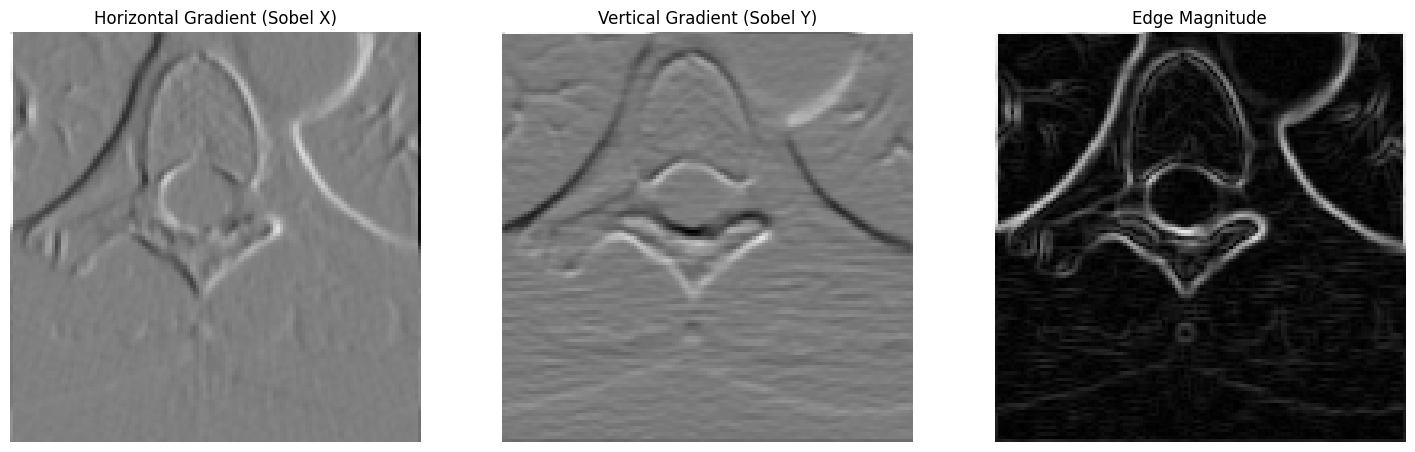

In [ ]:
# Sobel kernels for detecting horizontal and vertical edges
sobel_x_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobel_y_kernel = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

# TODO: Apply convolution with each kernel
grad_x =
grad_y =

# The total edge magnitude is the combination of the two gradients
edge_magnitude =

# Display the horizahorizontal gradient
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].imshow(grad_x, cmap=plt.cm.gray)
axes[0].set_title("Horizontal Gradient (Sobel X)")
axes[0].axis('off')
#TODO: display the vertical gradient and the final edge map


plt.show()

*The final edge map highlights the boundaries between different organs and tissues, which is a critical first step in many automated analysis tasks.*

***

## **5. Summary**
